In [1]:
# Package to Unzip
from pyunpack import Archive
import os


In [2]:
# Unzip the files
Archive('DataFiles\ELA.prz').extractall("./")

In [3]:
# Unzip the files
Archive('DataFiles\EelsROIMetadata of ELA (Live).prz').extractall("./test/")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.load('data.npy')

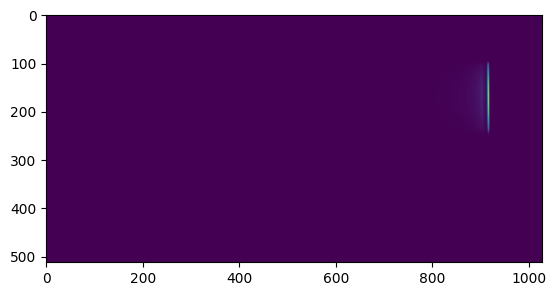

In [6]:
plt.imshow(data)

In [7]:
meta_data = np.load('meta_data.npy', allow_pickle=True)

In [8]:
meta_data[0]

{'camera.binning': (1, 1),
 'camera.pixel_size': 7.5e-05,
 'camera.time': '2022-12-08T20:39:08.612697',
 'camera.exposure_time': 0.03,
 'image_size': (1028, 512),
 'camera.detector_size': (1028, 512),
 'camera.area_offset': (0, 0),
 'source.name': 'Dectris ELA Si 500K',
 'source.type': 'camera',
 'ref_size': (1028, 512),
 'source.last_frame_info': {'series': 669,
  'frame': 24776,
  'start_time': 39470090967874,
  'stop_time': 39470120969100,
  'real_time': 30001225},
 'source.detector_config': {'auto_summation': True,
  'beam_center_x': 0.0,
  'beam_center_y': 0.0,
  'bit_depth_image': 32,
  'bit_depth_readout': 16,
  'compression': 'lz4',
  'count_time': 0.03,
  'countrate_correction_applied': True,
  'countrate_correction_count_cutoff': 299995,
  'data_collection_date': '2022-12-09T02:29:34.018+01:00',
  'description': 'Dectris ELA Si 500K',
  'detector_distance': 0.0,
  'detector_number': 'E-01-0543',
  'detector_readout_time': 1e-07,
  'detector_translation': [0.0, 0.0, 0.0],
  'e

In [9]:
data_model = np.load('data_model.npy', allow_pickle=True)

In [10]:
data_model[0]

{'objects': [{'type': 'Scaling',
   'inplace': False,
   'parameters': {'calibration_rules': ['Energy', 'Pixel'],
    'intensity_rule': 'Default'}},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908382025904,
   'parameters': {'name': '__GENERIC__',
    'fast_slice': True,
    'halfwidth': 0.125,
    'mode': 'live',
    'color': '#ffffff',
    'line width': 1.0,
    'normalize': True,
    'pre-edge': (None, None),
    'post-edge': (None, None),
    'bg-mode': 'fastlsq',
    'y_pos': (0, 0.5)},
   'annotations': []},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908338087536,
   'parameters': {'name': '__GENERIC__',
    'fast_slice': True,
    'halfwidth': 0.125,
    'mode': 'live',
    'color': '#ffffff',
    'line width': 1.0,
    'normalize': True,
    'pre-edge': (None, None),
    'post-edge': (None, None),
    'bg-mode': 'fastlsq',
    'y_pos': (0, 0.5)},
   'annotations': []},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908290524064,


In [11]:
file_format_versions = np.load('data_model.npy', allow_pickle=True)

In [12]:
file_format_versions[0]

{'objects': [{'type': 'Scaling',
   'inplace': False,
   'parameters': {'calibration_rules': ['Energy', 'Pixel'],
    'intensity_rule': 'Default'}},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908382025904,
   'parameters': {'name': '__GENERIC__',
    'fast_slice': True,
    'halfwidth': 0.125,
    'mode': 'live',
    'color': '#ffffff',
    'line width': 1.0,
    'normalize': True,
    'pre-edge': (None, None),
    'post-edge': (None, None),
    'bg-mode': 'fastlsq',
    'y_pos': (0, 0.5)},
   'annotations': []},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908338087536,
   'parameters': {'name': '__GENERIC__',
    'fast_slice': True,
    'halfwidth': 0.125,
    'mode': 'live',
    'color': '#ffffff',
    'line width': 1.0,
    'normalize': True,
    'pre-edge': (None, None),
    'post-edge': (None, None),
    'bg-mode': 'fastlsq',
    'y_pos': (0, 0.5)},
   'annotations': []},
  {'type': 'EelsROIMetadata',
   'inplace': False,
   'id': 1908290524064,


In [13]:
## note the data model and file format are the same
data_model == file_format_versions

array([ True])

In [14]:
class file_handling:
    def make_folder(self):
        """Utility to make folders
        Args:
            folder (string): name of folder
        Returns:
            string: path to folder
        """
        self.folder = self.filename.split('.')[0]
        
        # Makes folder
        os.makedirs(self.folder, exist_ok=True)

        return self.folder

In [15]:
class EELS_To_DataFed(file_handling):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.make_folder()
        
    def unzip(self):
        Archive(self.filename).extractall(self.folder)
        
    def extract_metadata(self):
        self.metadata = np.load(self.folder + '\meta_data.npy', allow_pickle=True)[0]
        self.data_model = np.load(self.folder + '\data_model.npy', allow_pickle=True)[0]
        self.metadata = self.data_model | self.metadata
        
    
        

In [16]:
os.makedirs(loader.filename.split('.')[0], exist_ok=True)

NameError: name 'loader' is not defined

In [19]:
loader.filename
print(loader.folder)

DataFiles\ELA


In [18]:
loader = EELS_To_DataFed("DataFiles\ELA.prz")
loader.unzip()
loader.extract_metadata()

In [151]:
# Import packages

import os
import getpass
import subprocess
from platform import platform
import sys


In [20]:
try:

    # This package is not part of anaconda and may need to be installed.
    from datafed.CommandLib import API

except ImportError:
    print("datafed not found. Installing from pip.")
    subprocess.call([sys.executable, "-m", "pip", "install", "datafed"])
    from datafed.CommandLib import API

from datafed import version as df_ver

if not df_ver.startswith("1.4"):
    print("Attempting to update DataFed.")
    subprocess.call([sys.executable, "-m", "pip", "install", "--upgrade", "datafed"])
    print(
        "Please restart the python kernel or upgrade manually to V 1.1.0:1 if you are repeatedly seeing this message via"
        "\n\tpip install --upgrade datafed"
    )
else:
    df_api = API()
    print("Success! You have DataFed: " + df_ver)

Success! You have DataFed: 1.4.0:0


In [21]:
from datafed.CommandLib import API
import json

In [22]:
df_api = API()

In [23]:
pl_resp = df_api.projectList()
print(pl_resp)

(item {
  id: "p/2021_berkeley_pfm_database"
  title: "2021_Berkeley_PFM_Database"
  owner: "u/jca318"
}
item {
  id: "p/2021_lane_martin_afm_database"
  title: "2021_Lane_Martin_AFM_Database"
  owner: "u/jca318"
}
item {
  id: "p/2021_lehigh_cornell_tem"
  title: "2021_Lehigh_Cornell_TEM"
  owner: "u/jca318"
}
item {
  id: "p/2021_lehigh_wallpaper_group_symmetry"
  title: "2021_Lehigh_Wallpaper_Group_Symmetry"
  owner: "u/jca318"
}
item {
  id: "p/2022_4dtem_noisy_benchmark"
  title: "2022_TEM_Noisy_Benchmark"
  owner: "u/jca318"
}
item {
  id: "p/2022_afm_oxford"
  title: "AFM Repository Oxford Instruments"
  owner: "u/jca318"
}
item {
  id: "p/2022_datafed_tutorial_lehigh"
  title: "2022_DataFed_Tutorial_Lehigh"
  owner: "u/jca318"
}
item {
  id: "p/2022_materials_project"
  title: "Materials Project Piezoresponse"
  owner: "u/jca318"
}
item {
  id: "p/2022_pld_plume_recording"
  title: "2022_PLD_Plume_Recording"
  owner: "u/yig319"
  creator: "u/jca318"
}
item {
  id: "p/delete"
  

In [24]:
context = "p/lhead"

print(df_api.collectionView("root", context=context))

(coll {
  id: "c/p_lhead_root"
  title: "Root Collection"
  alias: "root"
  desc: "Root collection for project lhead"
  owner: "p/lhead"
  notes: 0
}
, 'CollDataReply')


In [25]:
loader.metadata.keys()

dict_keys(['objects', 'active', 'id', 'is_group', 'view_state', 'type', 'camera.binning', 'camera.pixel_size', 'camera.time', 'camera.exposure_time', 'image_size', 'camera.detector_size', 'camera.area_offset', 'source.name', 'source.type', 'ref_size', 'source.last_frame_info', 'source.detector_config', 'source.geometry', 'electron_gun.voltage', 'electron_gun.voltage_offset', 'condenser.mode', 'objective.mode', 'projector.camera_length', 'projector.mode', 'scan_driver.magnification', 'scan_driver.magnification_reference', 'filter.zlp_xpos', 'filter.dispersion', 'filter.spectrum_height', 'filter.mode', 'filter.aperture', 'filter.energy_offset', 'filter.ht_offset', 'filter.lt_voltage', 'filter.sector_offset', 'filter.slit.mode', 'camera.magnification_factor', 'camera.camera_length_factor', 'repo_id', 'device.calib'])

In [26]:
parent_collection = "c/416330538"

dc_resp = df_api.dataCreate(
    "my important data",
    metadata=json.dumps(loader.metadata),
    parent_id=parent_collection,
    # The parent collection, whose alias is your username
)

In [27]:
print()

In [28]:
record_id = dc_resp[0].data[0].id

put_resp = df_api.dataPut(
    record_id,
    loader.filename,
    wait=True,  # Waits until transfer completes.
)
print(put_resp)

(task {
  id: "task/416358991"
  type: TT_DATA_PUT
  status: TS_SUCCEEDED
  client: "u/jca318"
  step: 3
  steps: 4
  msg: "Finished"
  ct: 1670983146
  ut: 1670983160
  source: "f134f91a-572a-11ed-ba55-d5fb255a47cc/c/Users/jca92/Documents/codes/TEM_Transfer/TEM_Transfer/DataFiles/ELA.prz"
  dest: "d/416358985"
}
, 'TaskDataReply')
